# Graphs

Graphs in this context model *discrete* elements. 

### Using NetworkX:

In [83]:
import networkx as nx
import matplotlib.pyplot as plt

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

%matplotlib inline

In [10]:
G = nx.DiGraph()
names = ("Alice", "Bob", "Chuck")
[G.add_node(name) for name in names]
print(G.nodes())

['Alice', 'Bob', 'Chuck']


In [11]:
G.add_edge("Alice", "Bob")
G.add_edge("Alice", "Chuck")
G.add_edge("Bob", "Alice")
G.add_edge("Bob", "Chuck")
print(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]


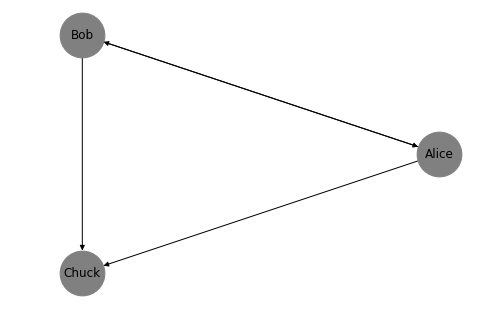

In [18]:
nx.draw_circular(G, 
                 node_color="gray",
                 node_size=2000, with_labels=True)

## Erdos-Renyi graphs

These are defined by a number of nodes and a probability *p* that any two nodes are connected. This interesting thing happens where graphs with low p are almost never **connected** (i.e. there is a path from every node to every other one), but are almost always connected with high p. There is a rapid transition between those two regimes at a particular *p*, denoted $ p^*$. This critical point is 

$$ p^* = \frac{(ln \ n)}{n} $$

### Generate a complete graph to test this:

In [19]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i > j:
                yield u, v
                
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

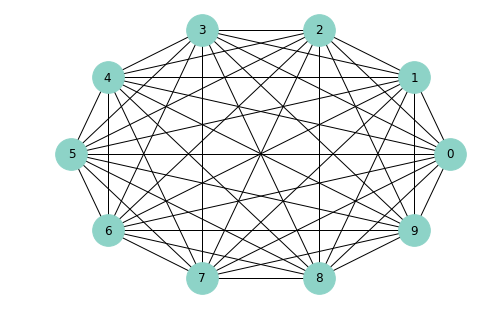

In [94]:
complete = make_complete_graph(10)
nx.draw_circular(complete,
                node_color=COLORS[0], node_size=1000,
                with_labels=True)

To check if any graph is **connected**, we can find all the neighbors of each node

In [30]:
[n for n in complete.neighbors(0)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
#     print("Reachable nodes from node {} are:\n".format(start))
    return seen

In [42]:
def is_connected(G):
    start = next(iter(G)) # interestingly this works
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

is_connected(complete)

True

## Generating ER Graphs

In [43]:
import numpy as np
def flip(p):
    return np.random.random() < p

def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

In [44]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

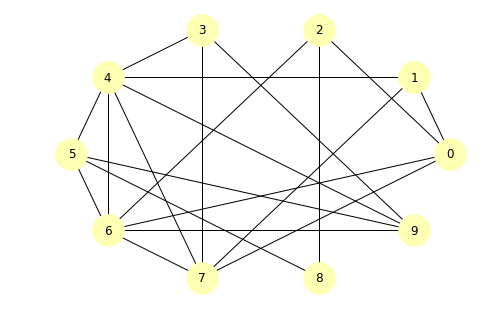

In [93]:
random_graph = make_random_graph(10, 0.4)
nx.draw_circular(random_graph,
                node_color=COLORS[1], node_size=1000,
                with_labels=True)

In [96]:
def prob_connected(n, p, iters=1000):
    return np.mean([is_connected(make_random_graph(n, p))
                   for _ in range(iters)])

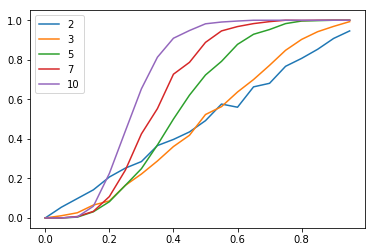

In [107]:
probs = np.arange(0, 1, 0.05)
for n in (2, 3, 5, 7, 10):
    plt.plot(probs, [prob_connected(n, p) for p in probs], label="{}".format(n))
plt.legend()